# 2016 US Election Analysis

The 2016 US Presidential Election dataset on Kaggle contains a wide range of data related to the 2016 United States presidential election. This dataset includes information on various aspects of the election, such as candidates, state-level results, county-level results, demographic information, and more. It's a valuable resource for data analysis and research related to the election.

The dataset will likely include various files in CSV format or other common data formats.

## Data

1. County Facts Dataset (df_county_facts):

This dataset contains a collection of factual information related to various counties in the United States. It includes demographic, economic, educational, and other statistical data for each county. Each row represents a specific county, and the columns provide information about population, income, education, housing, and more. This dataset serves as a valuable resource for analyzing and understanding the characteristics of different counties in the United States.

2. County Facts Dictionary Dataset (df_dictionary):

The County Facts Dictionary dataset is a companion to the County Facts dataset. It provides a dictionary or key that explains the meaning of the columns in the County Facts dataset. Each row in this dataset represents a column in the County Facts dataset, with a description or label that clarifies the data represented by that column. It's a reference guide to understand the variables used in the County Facts dataset.

3. Primary Results Dataset (df):

 The Primary Results dataset contains data related to the primary elections held during the 2016 United States presidential election. It includes information about the primary election results at the county level, including the votes cast for different political parties and candidates. Each row typically represents a county's primary election results, and the columns include data such as the state, county, party, candidate, votes, and fraction of votes. This dataset is essential for analyzing the outcomes of the primary elections during the 2016 U.S. presidential election.

## The objective and goals:

### Main Objective:
The primary objective of the 2016 U.S. Election Analysis is to delve deep into selected features, focusing on outliers in counties with the most significant vote counts. The analysis aims to compare and contrast these counties in California and Texas, which respectively represent the support bases of Hillary Clinton and Donald Trump, the two major candidates in the 2016 U.S. presidential election. By scrutinizing these outliers, the analysis seeks to uncover qualitative insights into the voting patterns, demographic composition, and socio-economic factors that influenced the electoral outcome.

### Goals:

Goal #1: Identify and examine counties with the highest vote counts to understand their significance in the election.

Goal #2: Conduct a qualitative analysis of outlier counties to discern trends, demographics, and voting behaviors.

Goal #3: Compare and contrast the outlier counties in California (Clinton's stronghold) and Texas (Trump's stronghold).

Goal #4: Provide insights for political parties and strategists to inform future campaign efforts.

In [239]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [240]:
file_path_county_facts = "/Users/camilahaikazumach/Desktop/GitHub/2016-US-Election/county_facts.csv"
file_path_dictionary = "/Users/camilahaikazumach/Desktop/GitHub/2016-US-Election/county_facts_dictionary.csv"
file_path_primary_results = "/Users/camilahaikazumach/Desktop/GitHub/2016-US-Election/primary_results.csv"

df_county_facts = pd.read_csv(file_path_county_facts)
df_dictionary = pd.read_csv(file_path_dictionary)
df = pd.read_csv(file_path_primary_results)

In [241]:
print("Shape of df_county_facts:", df_county_facts.shape)
print("Shape of df_dictionary:", df_dictionary.shape)
print("Shape of df:", df.shape)

Shape of df_county_facts: (3195, 54)
Shape of df_dictionary: (51, 2)
Shape of df: (24611, 8)


## EAD 

In [242]:
df.head()

,state,state_abbreviation,county,fips,party,candidate,votes,fraction_votes
0,Alabama,AL,Autauga,1001.0,Democrat,Bernie Sanders,544,0.182
1,Alabama,AL,Autauga,1001.0,Democrat,Hillary Clinton,2387,0.800
2,Alabama,AL,Baldwin,1003.0,Democrat,Bernie Sanders,2694,0.329
3,Alabama,AL,Baldwin,1003.0,Democrat,Hillary Clinton,5290,0.647
4,Alabama,AL,Barbour,1005.0,Democrat,Bernie Sanders,222,0.078


In [243]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24611 entries, 0 to 24610
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   state               24611 non-null  object 
 1   state_abbreviation  24611 non-null  object 
 2   county              24611 non-null  object 
 3   fips                24511 non-null  float64
 4   party               24611 non-null  object 
 5   candidate           24611 non-null  object 
 6   votes               24611 non-null  int64  
 7   fraction_votes      24611 non-null  float64
dtypes: float64(2), int64(1), object(5)
memory usage: 1.5+ MB


There are 100 values missing in the column fips.

In [244]:
df.isnull().sum()

state                   0
state_abbreviation      0
county                  0
fips                  100
party                   0
candidate               0
votes                   0
fraction_votes          0
dtype: int64

In the context of U.S. election datasets, the FIPS (Federal Information Processing Standards) code is a standardized numerical code used to uniquely identify entities such as states and counties within the United States.

State FIPS Code: A two-digit code that uniquely identifies each U.S. state.

County FIPS Code: A three-digit code that, when combined with the state FIPS code, uniquely identifies each U.S. county.

In [245]:
missing_fips_rows = df[df['fips'].isnull()]

missing_fips_state_votes = missing_fips_rows.groupby('state')['votes'].sum().reset_index()

print(f"States with Missing FIPS:\n{missing_fips_state_votes}")

States with Missing FIPS:
           state   votes
0  New Hampshire  525966


In [246]:
# Fill missing 'fips' values in 'df' with the correct code for New Hampshire

state_to_find = 'New Hampshire'

nh_fips = df_county_facts.loc[df_county_facts['area_name'] == state_to_find, 'fips'].values[0]

df.loc[df['state'] == state_to_find, 'fips'] = nh_fips

# Verify that missing values have been filled

missing_fips_count = df['fips'].isnull().sum()
print(f"Number of missing 'fips' values after filling: {missing_fips_count}")

Number of missing 'fips' values after filling: 0


The code for New Hampshire is 33. The "FIPS County Code" are to the Census Bureau Info page for that county.

In [247]:
nh_fips

33000

The dataset is completed with 50 states.

With a mean of approximately 2,306 votes and a standard deviation of 9,861, the data exhibits substantial variability, indicating that some candidates or observations received significantly more votes than others. The presence of a minimum value of 0 suggests that there are observations with no votes, possibly indicating missing data or cases where certain candidates received no votes. The median value of 358 falls below the mean, indicating right-skewness in the distribution, where a few observations garnered a substantial number of votes, as evidenced by a maximum of 590,502. 

In [248]:
unique_states_count = df['state'].nunique()
unique_counties_count = df['county'].nunique()

print(f"Number of unique states: {unique_states_count}")
print(f"Number of unique counties: {unique_counties_count}")

Number of unique states: 49
Number of unique counties: 2633


In [249]:
df['votes'].describe()

count     24611.000000
mean       2306.252773
std        9861.183572
min           0.000000
25%          68.000000
50%         358.000000
75%        1375.000000
max      590502.000000
Name: votes, dtype: float64

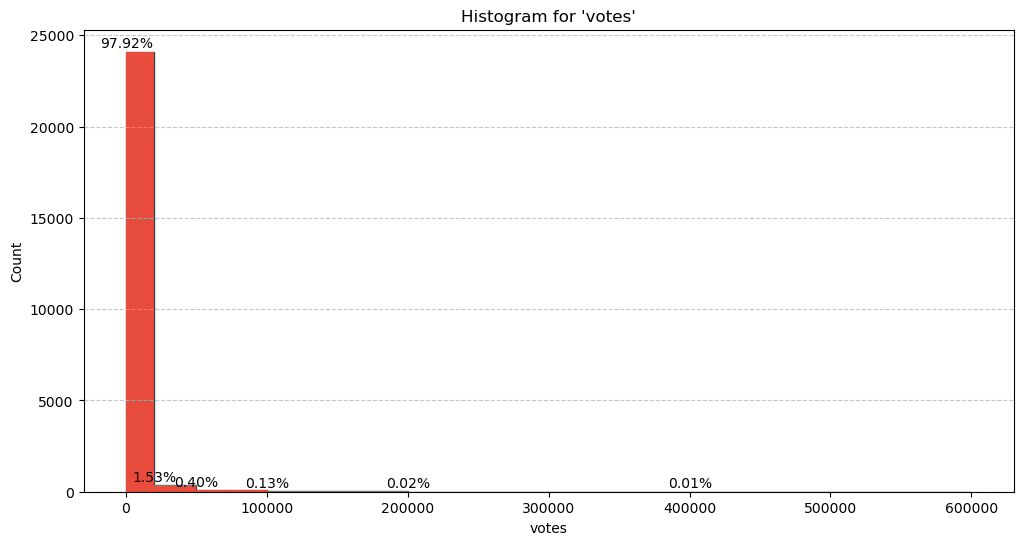

In [250]:
col = 'votes'

vote_range = [0, 20000, 50000, 100000, 200000, 400000, 600000] # Adjust the range and bin size as needed

plt.figure(figsize=(12, 6))

plt.hist(df[col], bins=vote_range, edgecolor='black', alpha=0.7)
plt.title(f"Histogram for '{col}'")
plt.xlabel(col)
plt.ylabel('Count')

total_count = len(df)
for bin_count, bin_start in zip(plt.hist(df[col], bins=vote_range)[0], vote_range):
    percentage = (bin_count / total_count) * 100
    plt.text(bin_start + 150, bin_count + 50, f'{percentage:.2f}%', fontsize=10, ha='center', va='bottom')

plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

## How many counties has zero votes?

In [251]:
count_zero_votes = (df[df['votes'] == 0]['county'].nunique())
total_counties = df['county'].nunique()

percentage_zero_votes = (count_zero_votes / total_counties) * 100

print("Number of counties with 0 votes:", count_zero_votes)
print(f"Percentage of counties with 0 votes: {percentage_zero_votes:.2f}%")

Number of counties with 0 votes: 384
Percentage of counties with 0 votes: 14.58%


In [252]:
zero_vote_counties = df[df['votes'] == 0]

zero_vote_counties_unique_per_state = zero_vote_counties.groupby('state')['county'].nunique()

print(f"Count of unique counties with 0 votes per state:\n{zero_vote_counties_unique_per_state}")

Count of unique counties with 0 votes per state:
state
Alaska            10
Arkansas           1
Idaho              1
Iowa              96
Maine            197
Massachusetts     41
Nebraska           4
North Dakota       2
Texas              7
Utah               3
Vermont           18
Wyoming           13
Name: county, dtype: int64


### Are there any patterns or trends in the parties and candidates that received 0 votes in counties with 0 votes?

 Clinton's campaign prioritized states where her message and policies resonated most effectively. Battleground states and densely populated areas received more attention and resources, aiming to secure electoral votes where they mattered most.

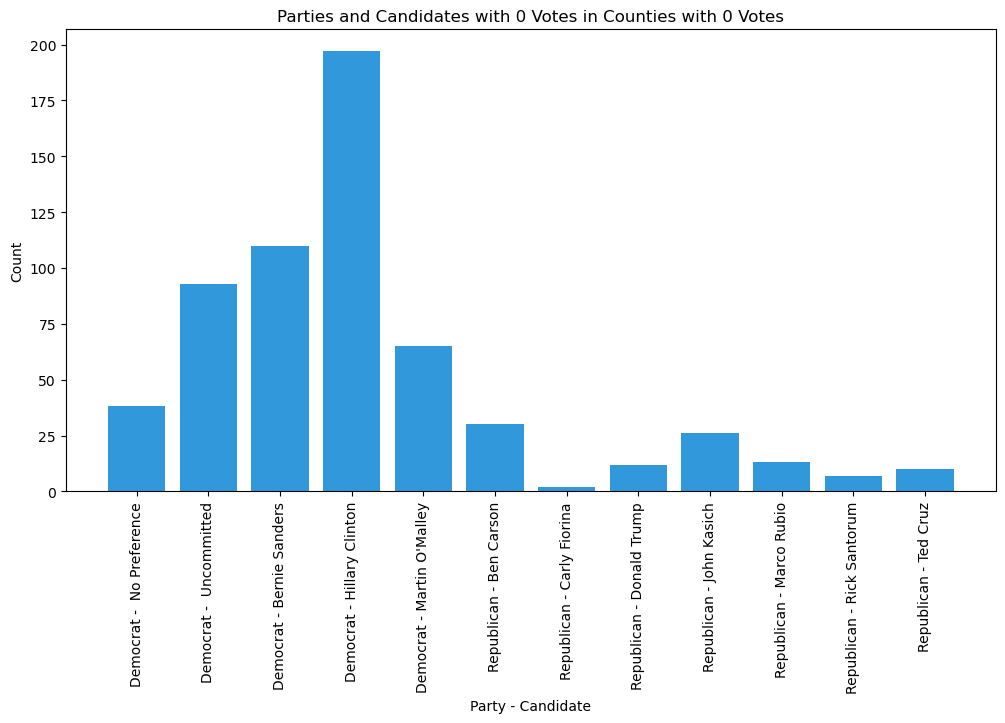

In [253]:
zero_vote_party_candidate = zero_vote_counties.groupby(['party', 'candidate']).size().reset_index(name='count')

plt.figure(figsize=(12, 6))
plt.bar(zero_vote_party_candidate['party'] + ' - ' + zero_vote_party_candidate['candidate'], zero_vote_party_candidate['count'])
plt.xlabel('Party - Candidate')
plt.ylabel('Count')
plt.title('Parties and Candidates with 0 Votes in Counties with 0 Votes')
plt.xticks(rotation=90) 
plt.show()

### Which candidate received the highest number of votes?

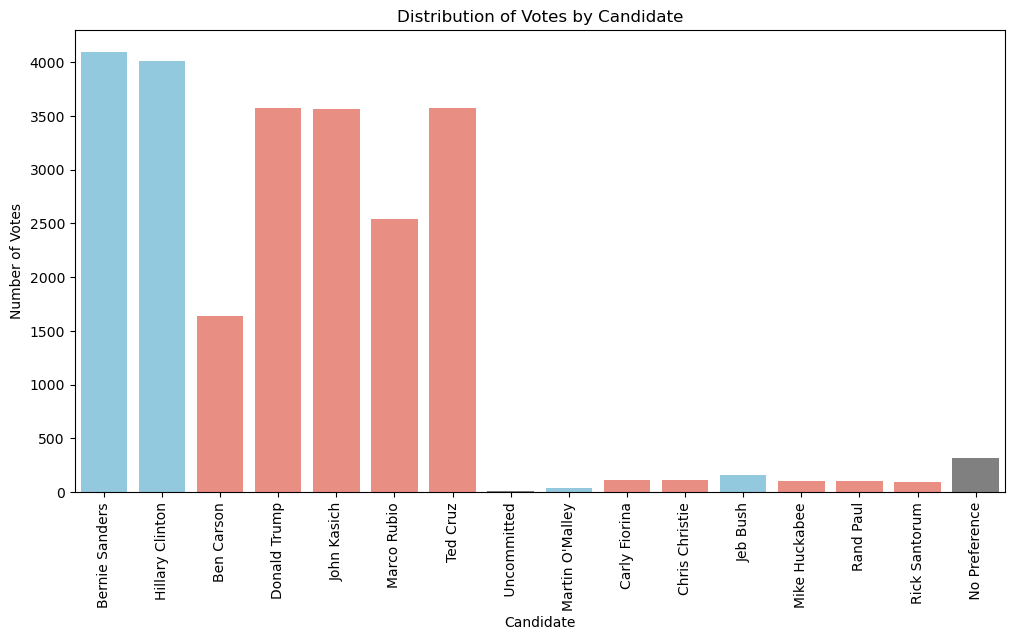

In [254]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a dictionary to map candidates to colors
candidate_colors = {
    'Hillary Clinton': 'skyblue',
    'Bernie Sanders': 'skyblue',
    "Martin O'Malley": 'skyblue',
    "Jeb Bush": 'skyblue',
    'Ben Carson': 'salmon',
    'Donald Trump': 'salmon',
    'John Kasich': 'salmon',
    'Ted Cruz': 'salmon',
    'Marco Rubio': 'salmon',
    'Carly Fiorina': 'salmon',
    'Chris Christie': 'salmon',
    'Mike Huckabee': 'salmon',
    'Rand Paul': 'salmon',
    'Rick Santorum': 'salmon',
    ' Uncommitted': 'gray',
    ' No Preference': 'gray',
}

df_filtered = df[df['votes'] > 0]

plt.figure(figsize=(12, 6))
sns.countplot(data=df_filtered, x='candidate', palette=candidate_colors)
plt.xlabel('Candidate')
plt.ylabel('Number of Votes')
plt.title('Distribution of Votes by Candidate')
plt.xticks(rotation=90)
plt.show()

### Which party received the highest number of votes?

In [255]:
df_filtered = df[df['votes'] > 0]

party_votes = df_filtered.groupby('party')['votes'].sum().reset_index()

party_votes.columns = ['Party', 'Total Votes']
party_votes = party_votes.sort_values(by='Total Votes', ascending=False)
party_votes.reset_index(drop=True, inplace=True)
party_votes.index += 1
party_votes

,Party,Total Votes
1,Republican,29098686
2,Democrat,27660501


### Which state has the highest number of votes?

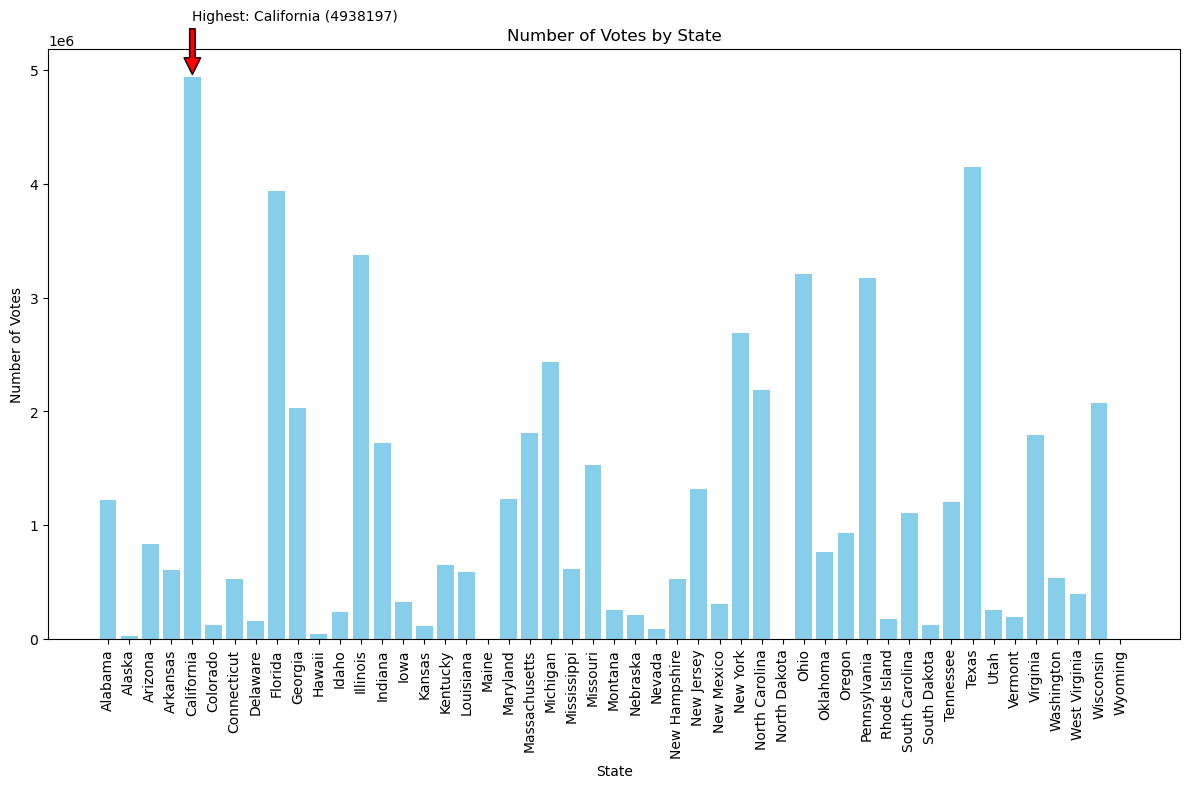

In [256]:
state_votes = df.groupby('state')['votes'].sum().reset_index()

state_with_highest_votes = state_votes[state_votes['votes'] == state_votes['votes'].max()]

plt.figure(figsize=(12, 8))
plt.bar(state_votes['state'], state_votes['votes'], color='skyblue')
plt.xlabel('State')
plt.ylabel('Number of Votes')
plt.title('Number of Votes by State')

# Highlight the state with the highest votes
plt.annotate(f'Highest: {state_with_highest_votes.iloc[0]["state"]} ({state_with_highest_votes.iloc[0]["votes"]})',
             (state_with_highest_votes.iloc[0]["state"], state_with_highest_votes.iloc[0]["votes"]),
             xytext=(state_with_highest_votes.iloc[0]["state"], state_with_highest_votes.iloc[0]["votes"] + 500000),
             arrowprops=dict(facecolor='red', shrink=0.05))

plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

### Most Voted Candidate in Each State

Donald Trump won the 2016 U.S. presidential election despite receiving fewer total popular votes than Hillary Clinton. This is because the U.S. presidential election is not determined solely by the nationwide popular vote. Instead, it employs the Electoral College system, where each state is assigned a certain number of electoral votes based on its population and representation in Congress. The candidate who secures a majority of electoral votes (270 or more) becomes the president, regardless of their total individual popular vote count. Trump won key swing states and secured more electoral votes, allowing him to win the election even though Clinton had a higher overall popular vote tally. The Electoral College system is a unique feature of the U.S. election process, and it can result in situations where the candidate with the most nationwide popular votes does not become president, as occurred in 2016.

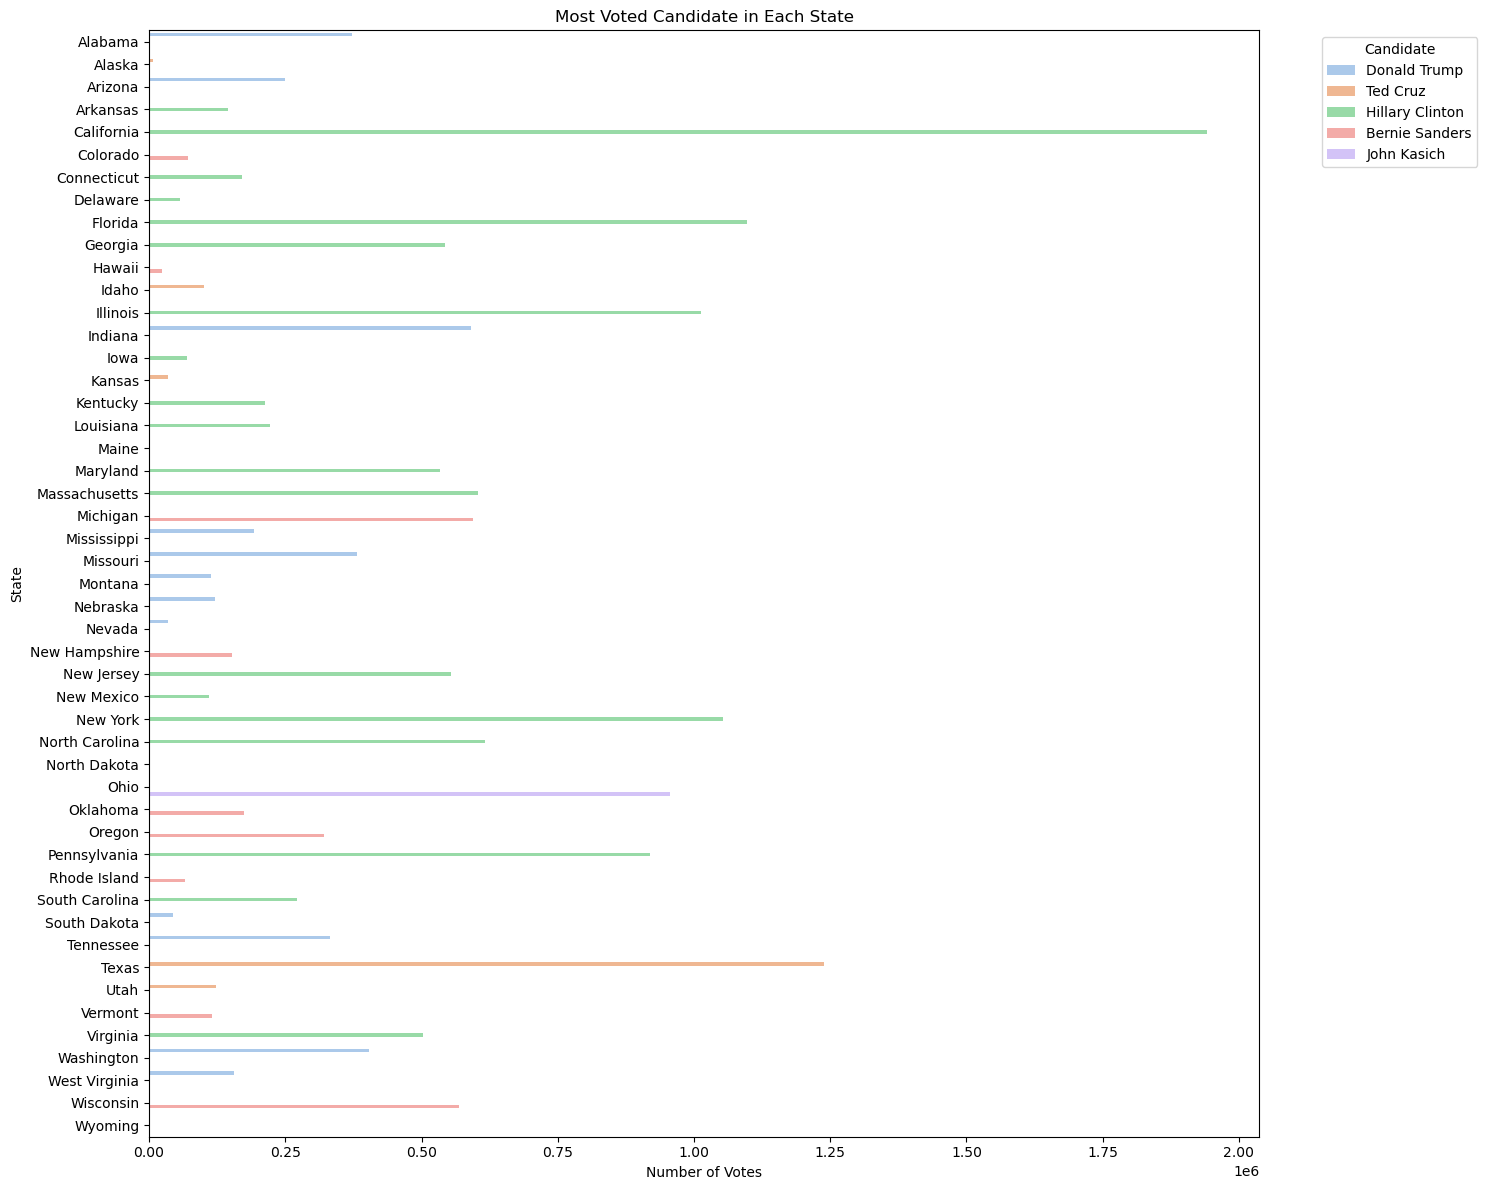

In [257]:
most_voted_candidates = df.groupby(['state', 'candidate'])['votes'].sum().reset_index()
idx = most_voted_candidates.groupby('state')['votes'].transform(max) == most_voted_candidates['votes']
most_voted_candidates = most_voted_candidates[idx]

colors = sns.color_palette('pastel', n_colors=len(most_voted_candidates))

plt.figure(figsize=(15, 12))  # Increase the figure size
sns.barplot(x='votes', y='state', hue='candidate', data=most_voted_candidates, palette=colors)
plt.xlabel('Number of Votes')
plt.ylabel('State')
plt.title('Most Voted Candidate in Each State')
plt.legend(title='Candidate', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

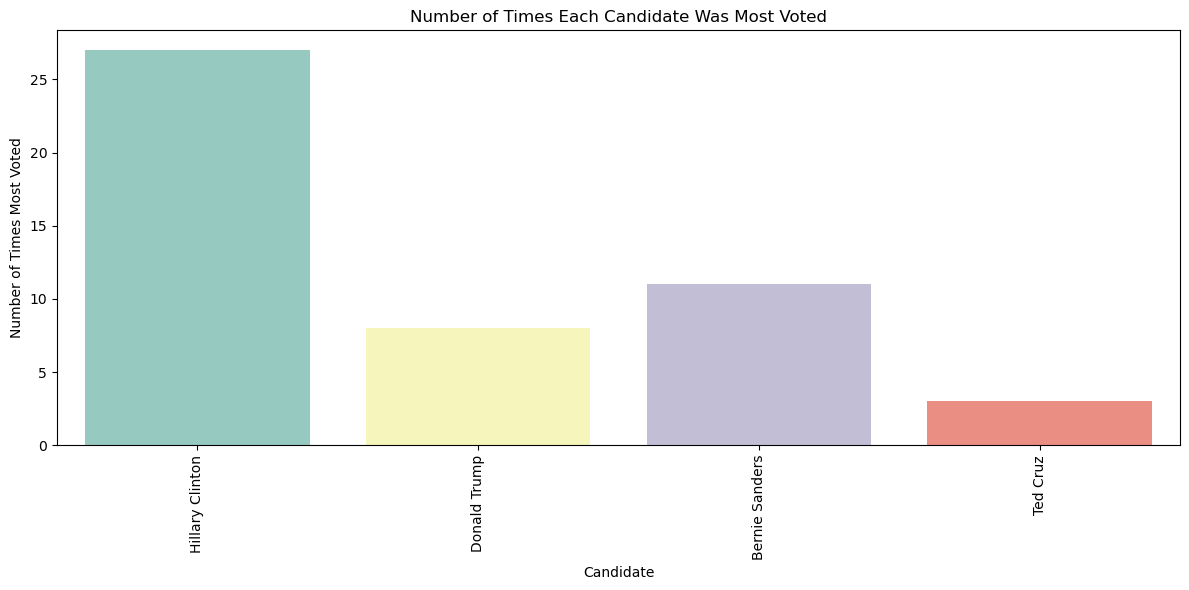

In [258]:
plt.figure(figsize=(12, 6))
sns.countplot(x='candidate', data=result, palette='Set3')
plt.xlabel('Candidate')
plt.ylabel('Number of Times Most Voted')
plt.title('Number of Times Each Candidate Was Most Voted')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

## Checking outliers

In [259]:
outliers_df = pd.DataFrame()

for column in df.select_dtypes(include='number'):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    column_outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    outliers_df = pd.concat([outliers_df, column_outliers])

### Which are the top 10 counties or districts with the highest number of votes in the 'outliers_df' dataset, and who were the candidates winning these areas?

The data from 'outliers_df' reveals intriguing patterns in the distribution of votes. Despite appearing fewer times in the top-voted regions compared to Hillary Clinton, Donald Trump's single appearance as the winner among the top 10 counties or districts suggests a strategic concentration of his electoral support. Moreover, Los Angeles County's multiple appearances with different candidates - first Clinton, then Sanders, and finally Trump - highlight the county's diverse political landscape, wherein various candidates resonated with distinct demographics. This analysis underscores the significance of considering not just the quantity of votes but also their geographical distribution and the underlying political dynamics when interpreting election results, reflecting the intricate nature of the U.S. political landscape.

In [260]:
outliers_df.sort_values(by='votes', ascending=False).head(10)

,state,state_abbreviation,county,fips,party,candidate,votes,fraction_votes
1386,California,CA,Los Angeles,6037.0,Democrat,Hillary Clinton,590502,0.570
1385,California,CA,Los Angeles,6037.0,Democrat,Bernie Sanders,434656,0.420
4451,Illinois,IL,Chicago,91700103.0,Democrat,Hillary Clinton,366954,0.536
4450,Illinois,IL,Chicago,91700103.0,Democrat,Bernie Sanders,311225,0.454
4463,Illinois,IL,Cook Suburbs,91700104.0,Democrat,Hillary Clinton,249217,0.536
17309,Pennsylvania,PA,Philadelphia,42101.0,Democrat,Hillary Clinton,212785,0.626
4462,Illinois,IL,Cook Suburbs,91700104.0,Democrat,Bernie Sanders,212428,0.457
1519,California,CA,Los Angeles,6037.0,Republican,Donald Trump,179130,0.698
15012,New York,NY,Manhattan,36061.0,Democrat,Hillary Clinton,177496,0.663
14964,New York,NY,Brooklyn,36047.0,Democrat,Hillary Clinton,174236,0.600


In [261]:
total_votes_df = df['votes'].sum()

total_votes_outliers = outliers_df['votes'].sum()

percentage_of_total = (total_votes_outliers / total_votes_df) * 100

print(f"The sum of votes in 'outliers_df' represents {percentage_of_total:.2f}% of the total votes in df.")

The sum of votes in 'outliers_df' represents 78.33% of the total votes in df.


### What is the average number of votes per county for state? 

In [262]:
state_agg = outliers_df.groupby('state').agg({'county': 'count', 'votes': 'sum'})

state_agg.rename(columns={'county': 'num_counties', 'votes': 'total_votes'}, inplace=True)

state_agg['avg_votes_per_county'] = state_agg['total_votes'] / state_agg['num_counties']

state_agg['avg_votes_per_county'] = state_agg['avg_votes_per_county'].astype(int)

print(state_agg.sort_values(by='total_votes', ascending=False))

                num_counties  total_votes  avg_votes_per_county
state                                                          
California               137      4769273                 34812
Florida                  203      3742551                 18436
Texas                    219      3331518                 15212
Pennsylvania             179      2944940                 16452
Illinois                 122      2872427                 23544
Ohio                     207      2788942                 13473
New York                 114      2376372                 20845
Michigan                 138      2026978                 14688
Wisconsin                145      1750265                 12070
North Carolina           169      1694798                 10028
Georgia                  121      1347107                 11133
Indiana                  128      1319418                 10307
New Jersey                65      1254199                 19295
Virginia                 113      118953

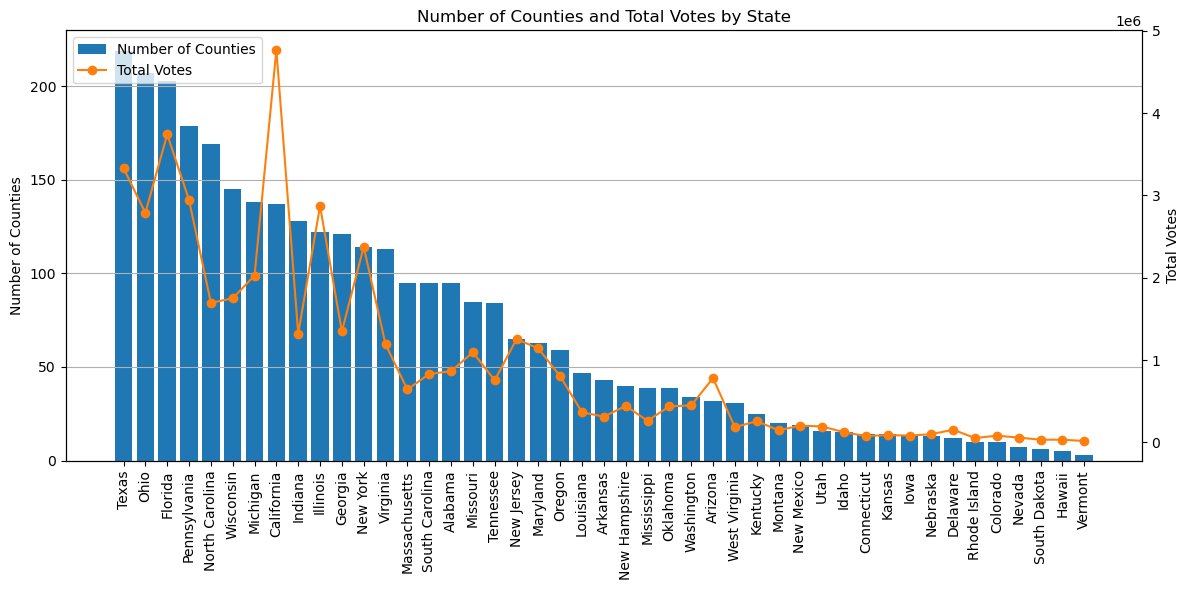

In [263]:
state_agg_sorted = state_agg.sort_values(by='num_counties', ascending=False)

fig, ax1 = plt.subplots(figsize=(12, 6))

ax1.bar(state_agg_sorted.index, state_agg_sorted['num_counties'], color='tab:blue', label='Number of Counties')
ax1.set_ylabel('Number of Counties')
ax1.set_title('Number of Counties and Total Votes by State')
ax1.tick_params(axis='x', rotation=90)
ax1.grid(axis='y')

ax2 = ax1.twinx()
ax2.plot(state_agg_sorted.index, state_agg_sorted['total_votes'], color='tab:orange', marker='o', label='Total Votes')
ax2.set_ylabel('Total Votes')
ax2.grid(False)

lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(lines + lines2, labels + labels2, loc='upper left')

plt.tight_layout()

plt.show()

## Top 5 cities with less votes

/var/folders/c9/qn19c27d7dzgw2f1scg0q2x00000gn/T/ipykernel_20797/2101112504.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  top_states['most_voted_candidate'] = most_voted_candidates


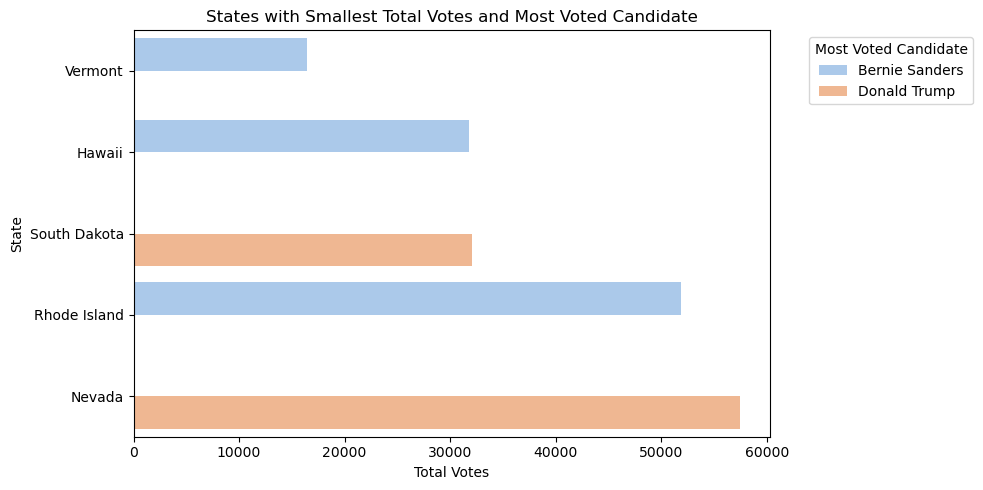

In [264]:
state_agg_small_votes = state_agg.sort_values(by='total_votes', ascending=True)

top_states = state_agg_small_votes.head(5) 

most_voted_candidates = []
for state in top_states.index:
    most_voted_candidate = df[df['state'] == state].groupby('candidate')['votes'].sum().idxmax()
    most_voted_candidates.append(most_voted_candidate)

top_states['most_voted_candidate'] = most_voted_candidates

plt.figure(figsize=(10, 5))
sns.barplot(data=top_states, x='total_votes', y=top_states.index, hue='most_voted_candidate', palette='pastel')
plt.xlabel('Total Votes')
plt.ylabel('State')
plt.title('States with Smallest Total Votes and Most Voted Candidate')
plt.legend(title='Most Voted Candidate', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

### Qualitative analysis

In [265]:
merged_df = filtered_df.merge(df_county_facts, on='fips', how='inner')

column_name_to_description = df_dictionary.set_index('column_name')['description'].to_dict()

merged_df.rename(columns=column_name_to_description, inplace=True)

merged_df.head()

,state,state_abbreviation_x,county,fips,party,candidate,votes,fraction_votes,area_name,state_abbreviation_y,...,"Hispanic-owned firms, percent, 2007","Women-owned firms, percent, 2007","Manufacturers shipments, 2007 ($1,000)","Merchant wholesaler sales, 2007 ($1,000)","Retail sales, 2007 ($1,000)","Retail sales per capita, 2007","Accommodation and food services sales, 2007 ($1,000)","Building permits, 2014","Land area in square miles, 2010","Population per square mile, 2010"
0,California,CA,Alameda,6001.0,Democrat,Bernie Sanders,91324,0.458,Alameda County,CA,...,8.9,32.2,25236865,35674007,17909054,12359,2807766,3438,739.02,2043.6
1,California,CA,Alameda,6001.0,Democrat,Hillary Clinton,107102,0.537,Alameda County,CA,...,8.9,32.2,25236865,35674007,17909054,12359,2807766,3438,739.02,2043.6
2,California,CA,Alameda,6001.0,Republican,Donald Trump,19951,0.669,Alameda County,CA,...,8.9,32.2,25236865,35674007,17909054,12359,2807766,3438,739.02,2043.6
3,California,CA,Alameda,6001.0,Republican,John Kasich,5108,0.171,Alameda County,CA,...,8.9,32.2,25236865,35674007,17909054,12359,2807766,3438,739.02,2043.6
4,California,CA,Alameda,6001.0,Republican,Ted Cruz,3208,0.108,Alameda County,CA,...,8.9,32.2,25236865,35674007,17909054,12359,2807766,3438,739.02,2043.6


In [266]:
merged_df.shape

(4249, 61)

In [267]:
merged_df.describe()

,fips,votes,fraction_votes,"Population, 2014 estimate","Population, 2010 (April 1) estimates base","Population, percent change - April 1, 2010 to July 1, 2014","Population, 2010","Persons under 5 years, percent, 2014","Persons under 18 years, percent, 2014","Persons 65 years and over, percent, 2014",...,"Hispanic-owned firms, percent, 2007","Women-owned firms, percent, 2007","Manufacturers shipments, 2007 ($1,000)","Merchant wholesaler sales, 2007 ($1,000)","Retail sales, 2007 ($1,000)","Retail sales per capita, 2007","Accommodation and food services sales, 2007 ($1,000)","Building permits, 2014","Land area in square miles, 2010","Population per square mile, 2010"
count,4249.000000,4249.000000,4249.000000,4.249000e+03,4.249000e+03,4249.000000,4.249000e+03,4249.000000,4249.000000,4249.00000,...,4249.000000,4249.000000,4.249000e+03,4.249000e+03,4.249000e+03,4249.000000,4.249000e+03,4249.000000,4249.000000,4249.000000
mean,34991.315368,5654.835491,0.318256,1.835980e+05,1.766457e+05,0.792116,1.766377e+05,5.902589,22.646246,17.41365,...,4.470016,17.700565,2.509163e+06,2.473621e+06,2.227670e+06,10013.757825,3.340594e+05,610.605319,932.271017,434.619981
std,15240.656326,18211.541213,0.208475,5.347754e+05,5.109554e+05,4.415912,5.109372e+05,1.231394,3.611786,4.64388,...,11.578204,13.308485,1.002214e+07,1.313900e+07,6.629684e+06,4578.814831,1.246065e+06,2286.983797,1069.191521,3091.702199
min,6001.000000,0.000000,0.000000,8.600000e+01,8.200000e+01,-10.800000,8.200000e+01,1.500000,7.400000,8.30000,...,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,0.000000,22.830000,0.100000
25%,17125.000000,267.000000,0.117000,1.463200e+04,1.478600e+04,-2.000000,1.478600e+04,5.100000,20.400000,14.40000,...,0.000000,0.000000,0.000000e+00,0.000000e+00,1.018270e+05,7320.000000,9.427000e+03,6.000000,501.320000,21.600000
50%,39173.000000,1098.000000,0.327000,4.035400e+04,4.080100e+04,-0.200000,4.080100e+04,5.800000,22.300000,17.10000,...,0.000000,24.100000,1.932400e+05,5.497000e+04,4.010920e+05,9838.000000,3.880000e+04,40.000000,787.460000,61.300000
75%,48205.000000,3816.000000,0.485000,1.282200e+05,1.244750e+05,2.700000,1.244750e+05,6.500000,24.500000,19.70000,...,2.600000,28.400000,1.470863e+06,4.515920e+05,1.488641e+06,12435.000000,1.719730e+05,250.000000,960.270000,170.700000
max,48507.000000,590502.000000,0.847000,1.011670e+07,9.818664e+06,22.400000,9.818605e+06,10.400000,35.100000,52.90000,...,78.000000,43.100000,1.692751e+08,2.054788e+08,1.191118e+08,46797.000000,2.023815e+07,40060.000000,20056.940000,69467.500000


Text(0.5, 1.0, 'Demographic Distribution')

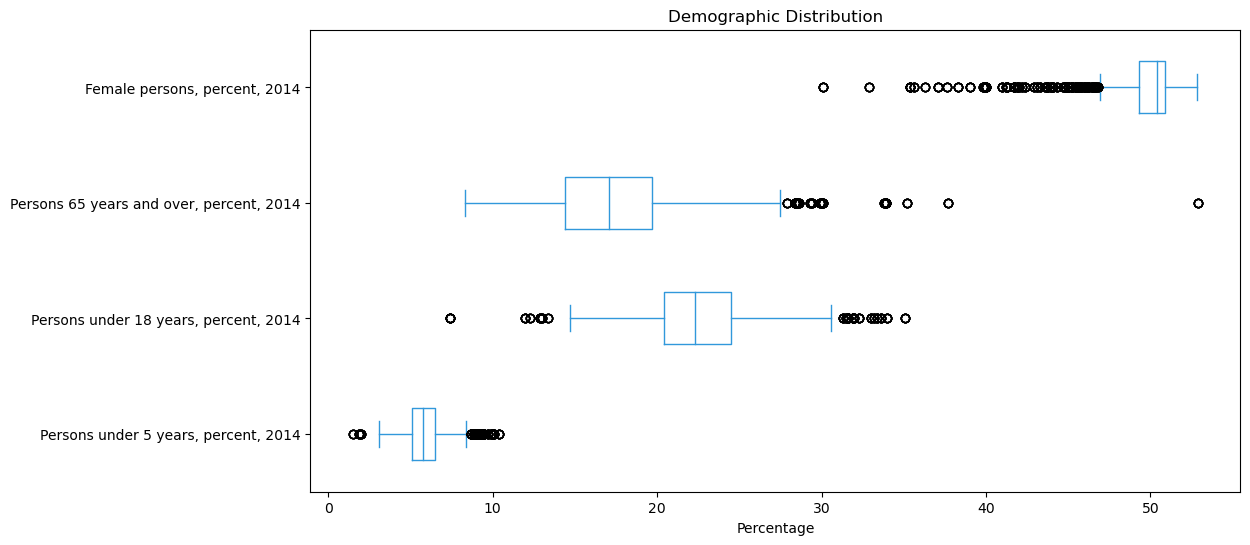

In [268]:
demographic_columns = [
    'Persons under 5 years, percent, 2014',
    'Persons under 18 years, percent, 2014',
    'Persons 65 years and over, percent, 2014',
    'Female persons, percent, 2014'
]
merged_df[demographic_columns].plot(kind='box', vert=False, figsize=(12, 6))
plt.xlabel('Percentage')
plt.title('Demographic Distribution')

Text(0.5, 1.0, 'Education and Language Distribution')

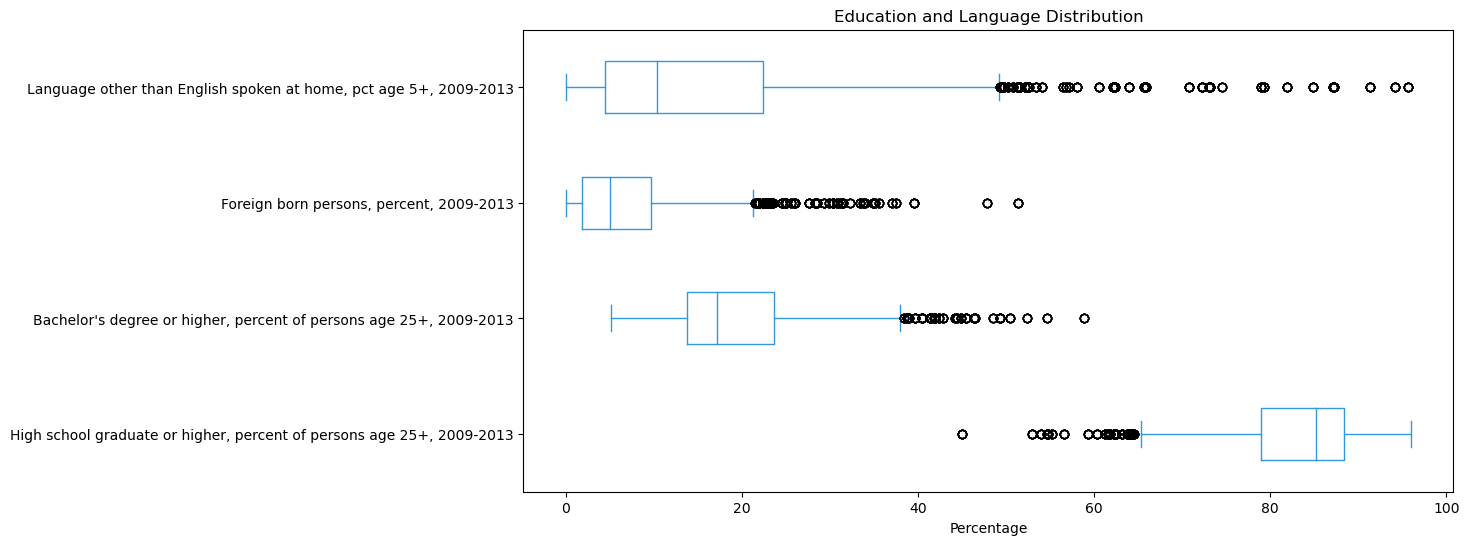

In [269]:
education_language_columns = [
    'High school graduate or higher, percent of persons age 25+, 2009-2013',
    "Bachelor's degree or higher, percent of persons age 25+, 2009-2013",
    'Foreign born persons, percent, 2009-2013',
    'Language other than English spoken at home, pct age 5+, 2009-2013'
]
merged_df[education_language_columns].plot(kind='box', vert=False, figsize=(12, 6))
plt.xlabel('Percentage')
plt.title('Education and Language Distribution')

1. Average Demographic Composition:

On average, Texas counties have a higher percentage of persons under 5 years compared to California. This indicates that, in Texas, there is a larger population of young children relative to the total population.

2. Distribution Variability:

California exhibits a more diverse distribution of the percentage of persons under 5 years. This means that California's counties vary widely in terms of the prevalence of young children. Some counties have very low percentages, while others have very high percentages. This diversity reflects California's diverse geography and population.

In contrast, Texas counties show a distribution that is closer to a normal curve. The percentages of persons under 5 years tend to cluster around a central value, with fewer outliers. This suggests that Texas counties share more consistent demographic characteristics.

3. Possible Policy Implications:

California's demographic diversity may require a broader range of services and programs to address the unique needs of different communities across the state.

Texas, with its more uniform demographic distribution, might benefit from more consistent statewide policies and initiatives.

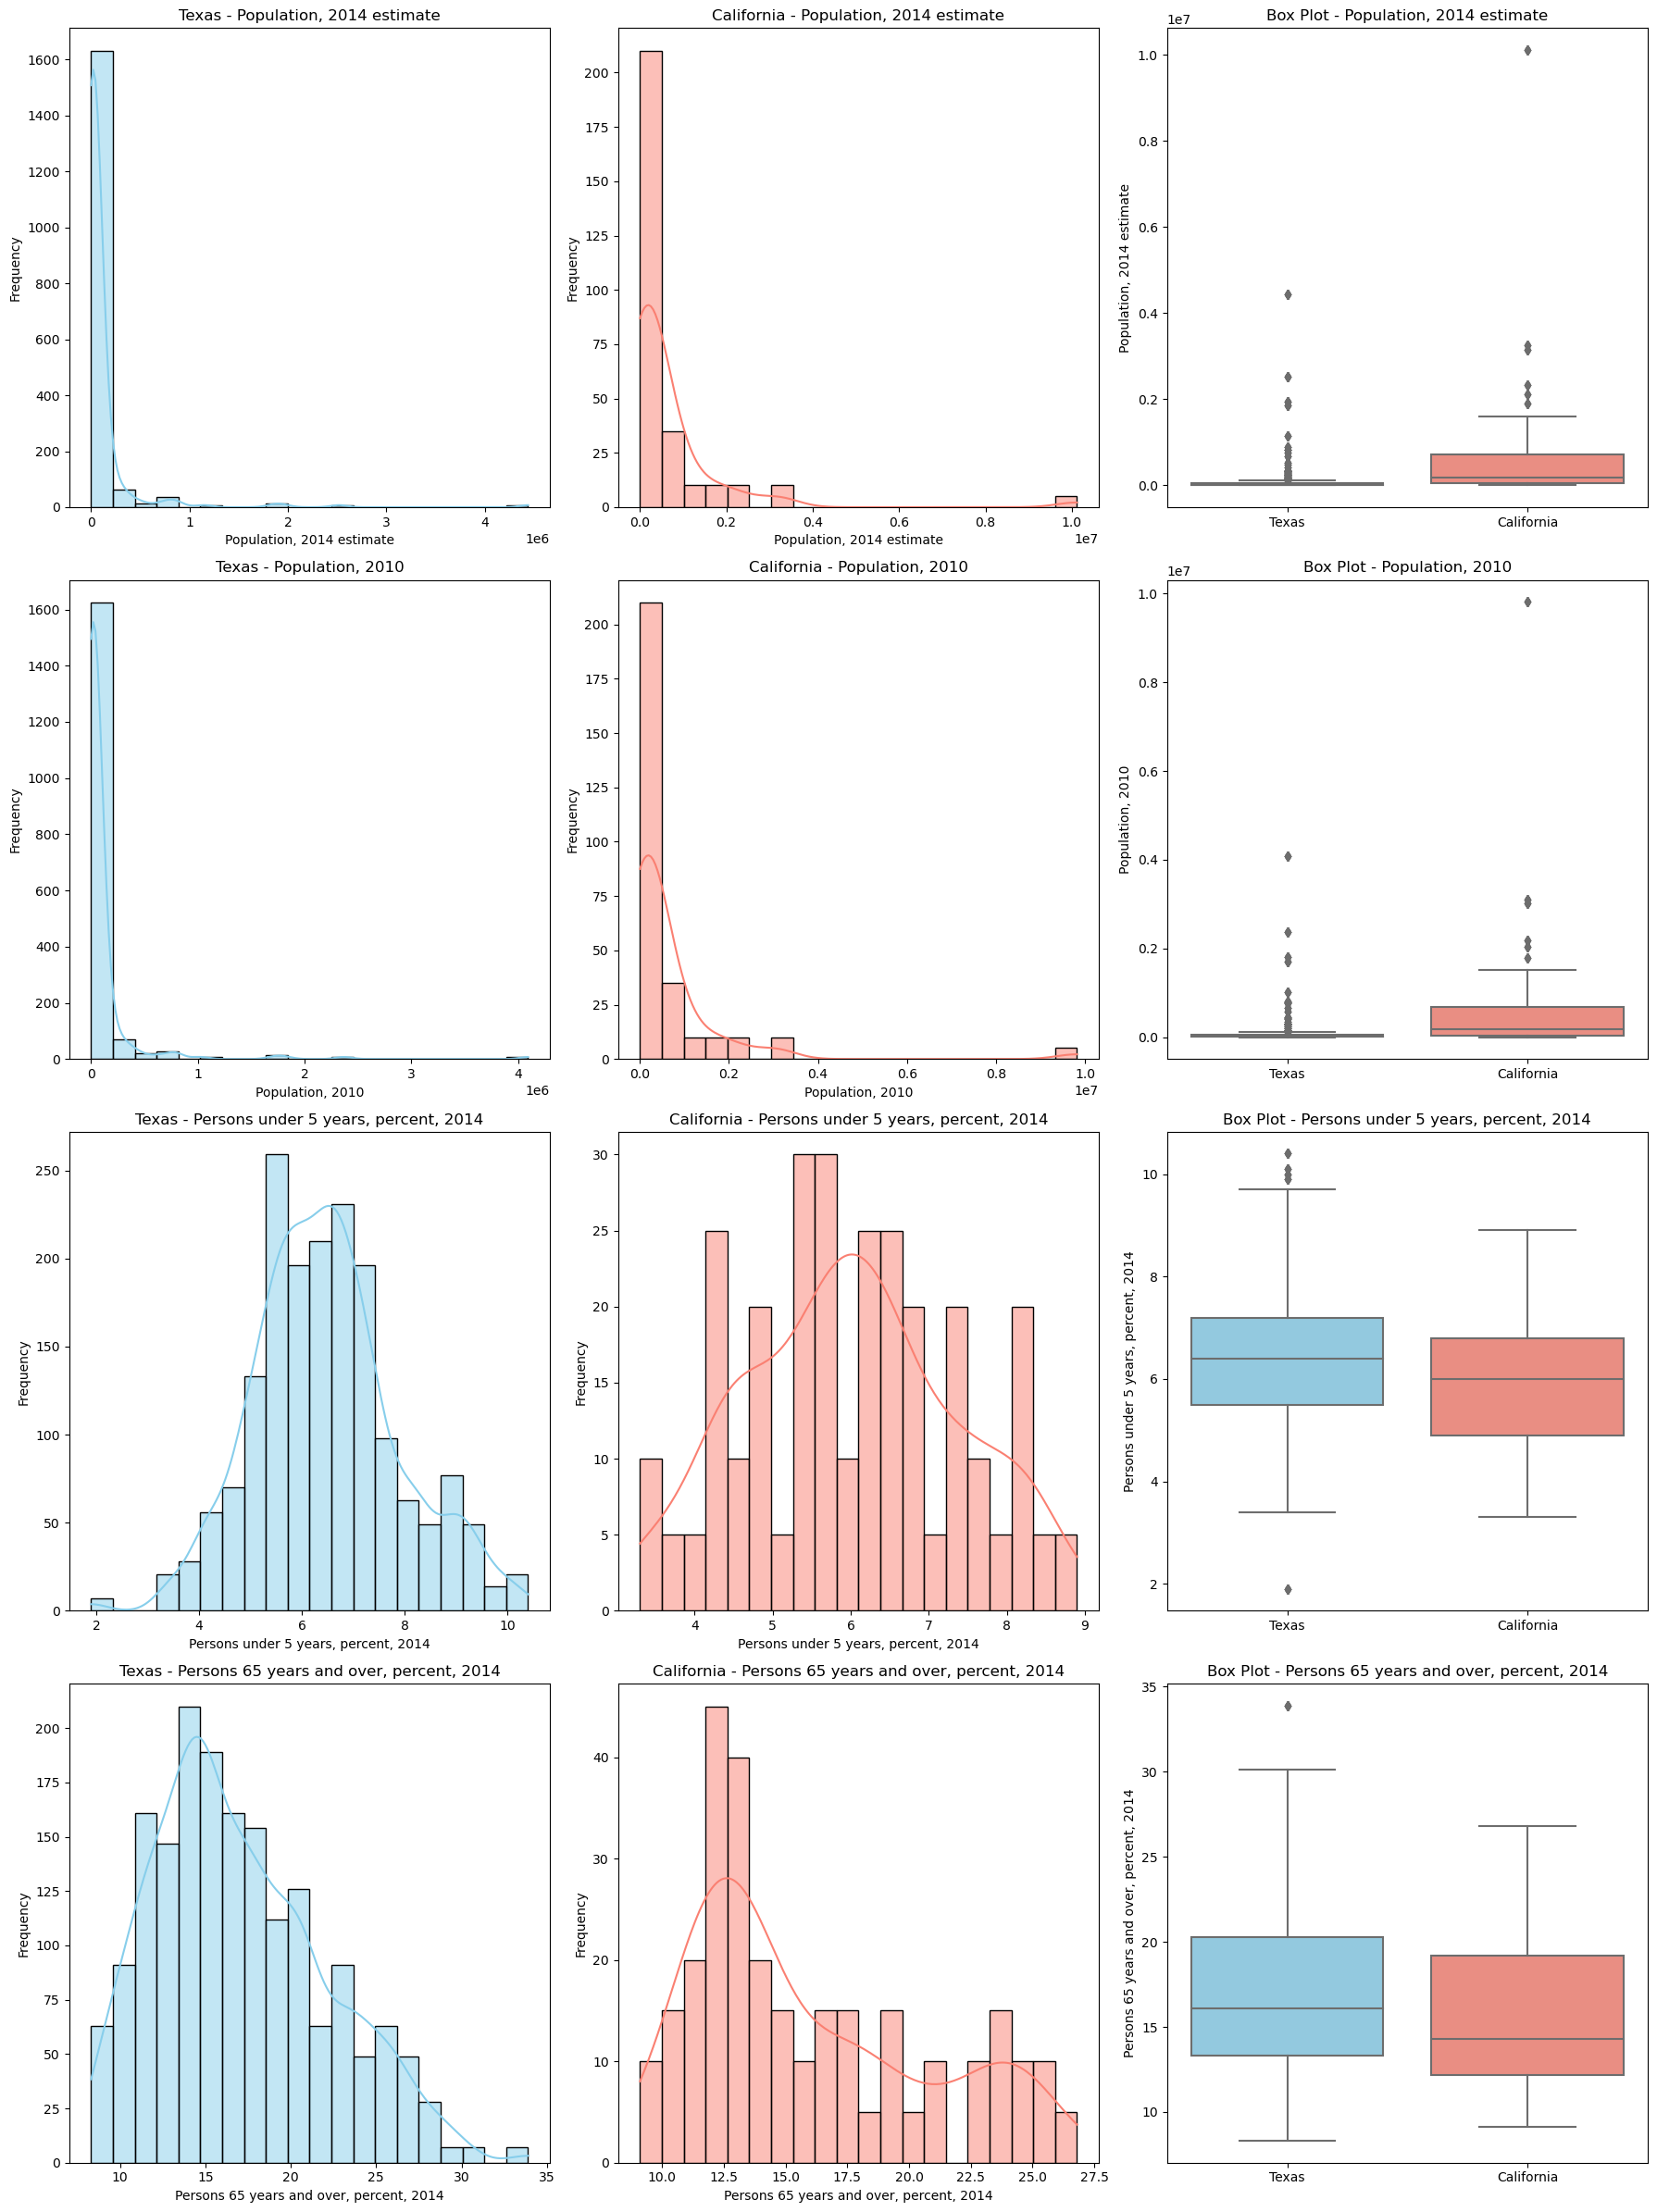

In [270]:
columns_to_compare = [
    'Population, 2014 estimate',
    'Population, 2010',
    'Persons under 5 years, percent, 2014',
    'Persons 65 years and over, percent, 2014'
]

texas_data = merged_df[merged_df['state'] == 'Texas']
california_data = merged_df[merged_df['state'] == 'California']

fig, axes = plt.subplots(nrows=len(columns_to_compare), ncols=3, figsize=(18, 24))

for i, column in enumerate(columns_to_compare):
    # Histogram
    ax1 = axes[i, 0]
    sns.histplot(data=texas_data, x=column, bins=20, kde=True, color='skyblue', ax=ax1)
    ax1.set_xlabel(column)
    ax1.set_ylabel('Frequency')
    ax1.set_title(f'Texas - {column}')
    
    ax2 = axes[i, 1]
    sns.histplot(data=california_data, x=column, bins=20, kde=True, color='salmon', ax=ax2)
    ax2.set_xlabel(column)
    ax2.set_ylabel('Frequency')
    ax2.set_title(f'California - {column}')
    
    # Box Plot
    ax3 = axes[i, 2]
    sns.boxplot(data=[texas_data[column], california_data[column]], palette=['skyblue', 'salmon'], ax=ax3)
    ax3.set_xticklabels(['Texas', 'California'])
    ax3.set_ylabel(column)
    ax3.set_title(f'Box Plot - {column}')

plt.tight_layout()
plt.show()

### Demographic Analysis

The demographic analysis of Texas and California reveals distinctive patterns in the distribution of age groups and gender proportions. Notably, California's demographic landscape showcases a more diverse distribution of children under 5 years, with varying percentages across counties. In contrast, Texas exhibits a more uniform distribution. An intriguing finding in California is the bimodal distribution of individuals under 18 years, which creates peaks around 20% and 30% with a noticeable gap at 25%, while Texas shows a more symmetric distribution. Furthermore, California has a higher percentage of elderly individuals (aged 65 and over) and a greater proportion of females in its population compared to Texas. These demographic differences may be influenced by factors such as population density, urbanization, and regional demographics, warranting further investigation into their underlying causes and implications.

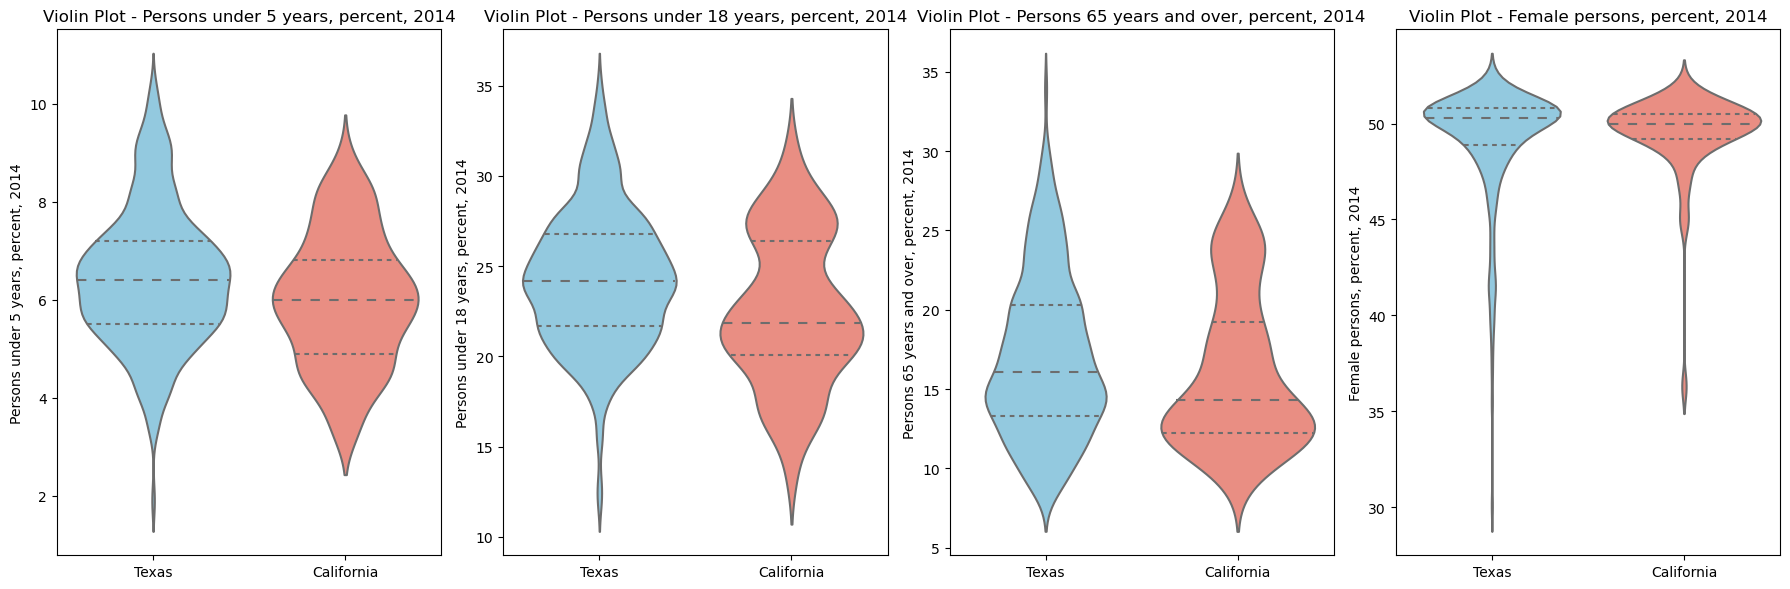

In [271]:
demographic_columns = [
    'Persons under 5 years, percent, 2014',
    'Persons under 18 years, percent, 2014',
    'Persons 65 years and over, percent, 2014',
    'Female persons, percent, 2014'
]

texas_data = merged_df[merged_df['state'] == 'Texas']
california_data = merged_df[merged_df['state'] == 'California']

fig, axes = plt.subplots(nrows=1, ncols=len(demographic_columns), figsize=(18, 6))

for i, column in enumerate(demographic_columns):
    ax = axes[i]
    sns.violinplot(data=[texas_data[column], california_data[column]], palette=['skyblue', 'salmon'], ax=ax, inner='quart')
    ax.set_xticklabels(['Texas', 'California'])
    ax.set_ylabel(column)
    ax.set_title(f'Violin Plot - {column}')

plt.tight_layout()
plt.show()

### Race and Ethnicity Analysis

Texas exhibits a significant concentration of the white-alone population, with a pronounced curve between 90% and 100%. In contrast, California's population is more diverse, with a less concentrated distribution. When considering the black or African American population alone, both states have similar averages, but California boasts a larger overall count. Texas, on the other hand, has notably lower percentages of American Indian or Alaska Native, Asian, and Native Hawaiian and Other Pacific Islander populations. The most striking difference lies in the "Two or More Races" category, where California reports much higher percentages compared to Texas. Additionally, Texas has a substantial Hispanic or Latino population, significantly surpassing California. These findings underscore the demographic disparities between the two states, influenced by factors such as historical migration patterns, cultural diversity, and regional preferences. Further exploration of these differences can provide valuable insights into the unique racial and ethnic dynamics of each state.

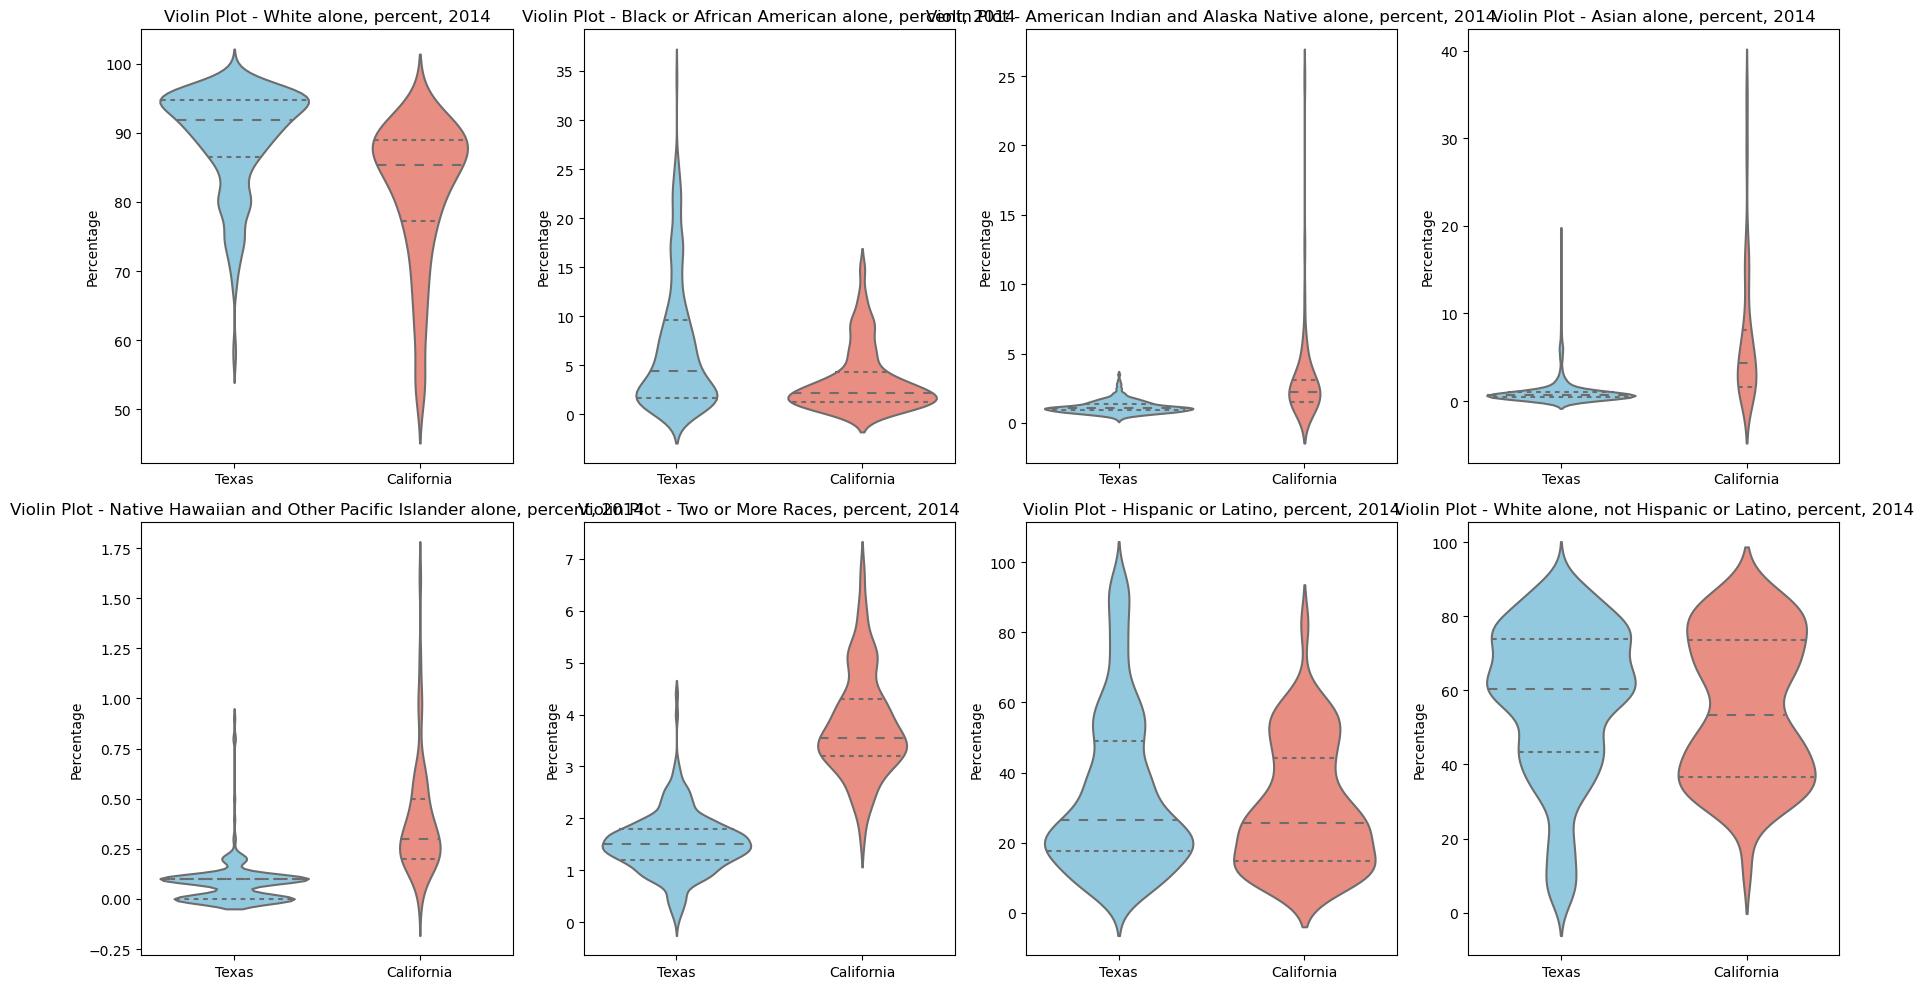

In [272]:
race_ethnicity_columns = [
    'White alone, percent, 2014',
    'Black or African American alone, percent, 2014',
    'American Indian and Alaska Native alone, percent, 2014',
    'Asian alone, percent, 2014',
    'Native Hawaiian and Other Pacific Islander alone, percent, 2014',
    'Two or More Races, percent, 2014',
    'Hispanic or Latino, percent, 2014',
    'White alone, not Hispanic or Latino, percent, 2014'
]

texas_data = merged_df[merged_df['state'] == 'Texas']
california_data = merged_df[merged_df['state'] == 'California']

fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(18, 10))

for i, column in enumerate(race_ethnicity_columns):
    ax = axes[i // 4, i % 4]
    sns.violinplot(data=[texas_data[column], california_data[column]], palette=['skyblue', 'salmon'], ax=ax, inner='quart')
    ax.set_xticklabels(['Texas', 'California'])
    ax.set_ylabel('Percentage')
    ax.set_title(f'Violin Plot - {column}')

plt.tight_layout()
plt.show()

### Education and Language Analysis

The analysis of education and language factors in California reveals that, on average, the state exhibits higher educational attainment compared to Texas. Specifically, California boasts higher percentages of individuals with at least a high school diploma or bachelor's degree, reflecting a more educated population. This significant difference is most notable in the "Bachelor's degree or higher" category, where California's average surpasses Texas by a considerable margin. Moreover, California also has a greater proportion of foreign-born residents, indicating a diverse and immigrant-rich population. This diversity is further highlighted by the higher percentage of individuals who speak a language other than English at home, especially among those aged five and above. These findings point to California's role as a hub for education, cultural diversity, and international migration, shaping its unique socio-educational landscape when compared to Texas.

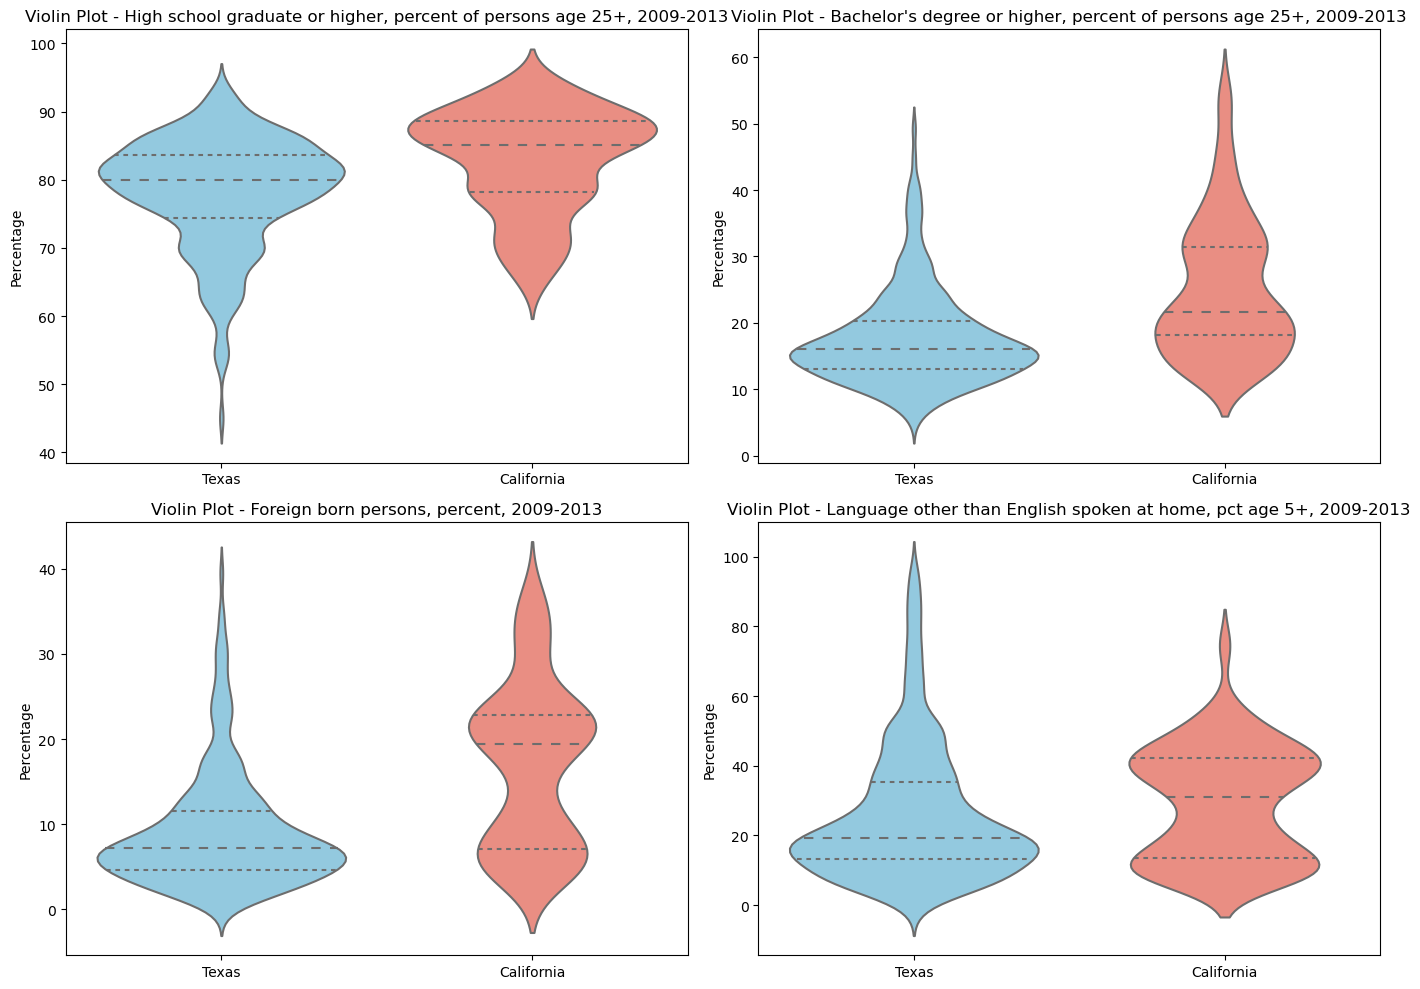

In [273]:
education_language_columns = [
    'High school graduate or higher, percent of persons age 25+, 2009-2013',
    "Bachelor's degree or higher, percent of persons age 25+, 2009-2013",
    'Foreign born persons, percent, 2009-2013',
    'Language other than English spoken at home, pct age 5+, 2009-2013'
]

texas_data = merged_df[merged_df['state'] == 'Texas']
california_data = merged_df[merged_df['state'] == 'California']

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(14, 10))

for i, column in enumerate(education_language_columns):
    ax = axes[i // 2, i % 2]
    sns.violinplot(data=[texas_data[column], california_data[column]], palette=['skyblue', 'salmon'], ax=ax, inner='quart')
    ax.set_xticklabels(['Texas', 'California'])
    ax.set_ylabel('Percentage')
    ax.set_title(f'Violin Plot - {column}')

plt.tight_layout()
plt.show()

### Economic and Business Analysis

The economic and business analysis reveals striking differences between California and Texas. California boasts higher per capita income and median household income, reflecting its more affluent population. However, income distribution in California is dispersed, while Texas exhibits a concentrated income distribution. Both states share similar average poverty rates, but Texas has a significantly higher volume of individuals below the poverty line. Texas also showcases a more extensive range of poverty rates. In terms of the total number of firms, Texas lags behind California, suggesting a more diverse business landscape in the latter. These findings emphasize the nuanced economic disparities between the two states, encompassing income levels, poverty rates, and business environments.

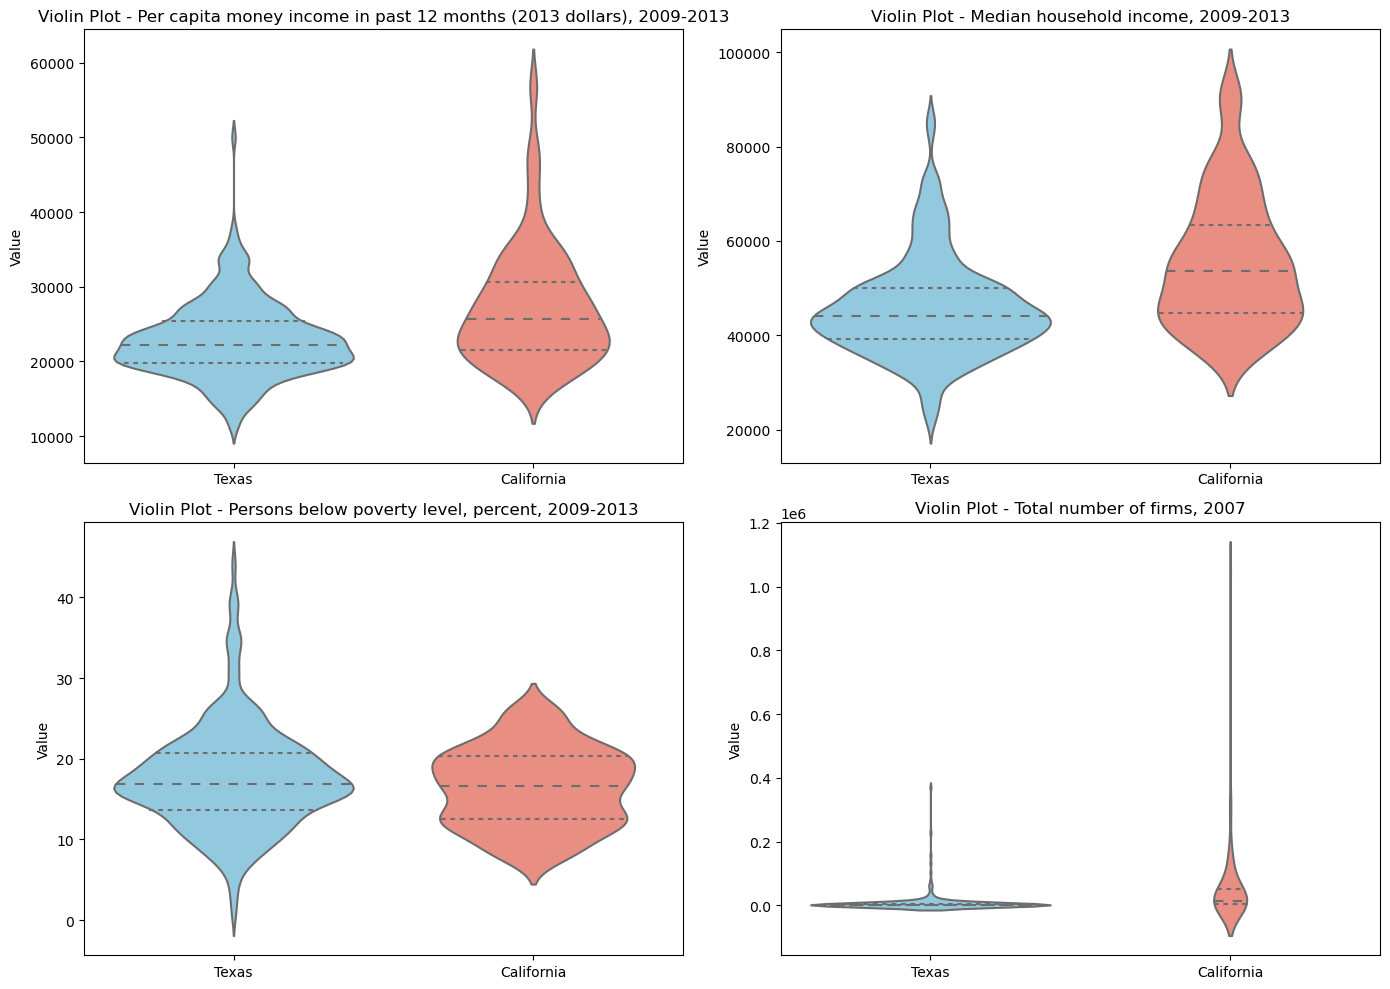

In [274]:
economic_business_columns = [
    'Per capita money income in past 12 months (2013 dollars), 2009-2013',
    'Median household income, 2009-2013',
    'Persons below poverty level, percent, 2009-2013',
    'Total number of firms, 2007'
]

texas_data = merged_df[merged_df['state'] == 'Texas']
california_data = merged_df[merged_df['state'] == 'California']

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(14, 10))

for i, column in enumerate(economic_business_columns):
    ax = axes[i // 2, i % 2]
    sns.violinplot(data=[texas_data[column], california_data[column]], palette=['skyblue', 'salmon'], ax=ax, inner='quart')
    ax.set_xticklabels(['Texas', 'California'])
    ax.set_ylabel('Value')
    ax.set_title(f'Violin Plot - {column}')

plt.tight_layout()
plt.show()

### Results and Evaluation

The analysis of the 2016 U.S. presidential election data has yielded several noteworthy findings and insights. Firstly, it became evident that Hillary Clinton's campaign adopted a nuanced and data-driven strategy, concentrating resources on specific states and counties where electoral support seemed promising. This targeted approach underscores the growing importance of data analytics in modern political campaigning, where understanding the demographics and regional intricacies can significantly impact electoral outcomes.

One particularly striking observation was the victory of Donald Trump in the 2016 election despite receiving fewer total popular votes than Hillary Clinton. This outcome was attributed to the Electoral College system, which distributes electoral votes by state, and Trump's success in key swing states. This reinforces the significance of state-level campaigning and the unique nature of the U.S. electoral process.

Moreover, the analysis revealed compelling trends and variations in demographic and socioeconomic factors between California and Texas, exemplifying the distinct characteristics of these states. These disparities underscore the importance of recognizing regional nuances in political strategies.

In conclusion, this data science project provides valuable insights for political parties and strategists. It emphasizes the power of data analysis in crafting tailored campaigns and highlights the pivotal role of understanding the Electoral College system. As campaigns evolve and voter behaviors change, data-driven decision-making will remain central to the success of future political endeavors. This analysis contributes to a deeper comprehension of the multifaceted dynamics that shaped the 2016 U.S. presidential election.

### Future Work

While this data science project has shed light on crucial aspects of the 2016 U.S. presidential election, there are several avenues for future research and analysis:

Predictive Modeling: Developing predictive models based on historical election data can help forecast future electoral outcomes. Employing machine learning algorithms and considering evolving socio-political factors can enhance the accuracy of such predictions.

Deep Dive into Swing States: Further exploration of swing states, which play a pivotal role in U.S. elections, can uncover insights into the factors that influence their voting behaviors. This analysis can guide campaign strategies in crucial battlegrounds.

Temporal Analysis: Examining how demographic, economic, and political factors evolve over time can provide a longitudinal perspective on electoral trends. This could involve comparing the 2016 election with subsequent ones or assessing the impact of significant events on voting patterns.

Incorporating these avenues of exploration can lead to a deeper understanding of the intricacies of electoral processes, aid in the development of more effective campaign strategies, and contribute to the advancement of data-driven political analysis. The ever-evolving nature of politics and data science ensures that future research in this domain will remain both relevant and impactful.